In [1]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment('Titanic ML Flow')

<Experiment: artifact_location='file:///C:/Users/prave/Second%20Part/ML%20Flow/1/mlruns/2', creation_time=1688483486718, experiment_id='2', last_update_time=1688483486718, lifecycle_stage='active', name='Titanic ML Flow', tags={}>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Titanic+Data+Set.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [8]:
Age_mean = df.Age[df.Pclass == 3].mean()
df['Age'].fillna(value=Age_mean, inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

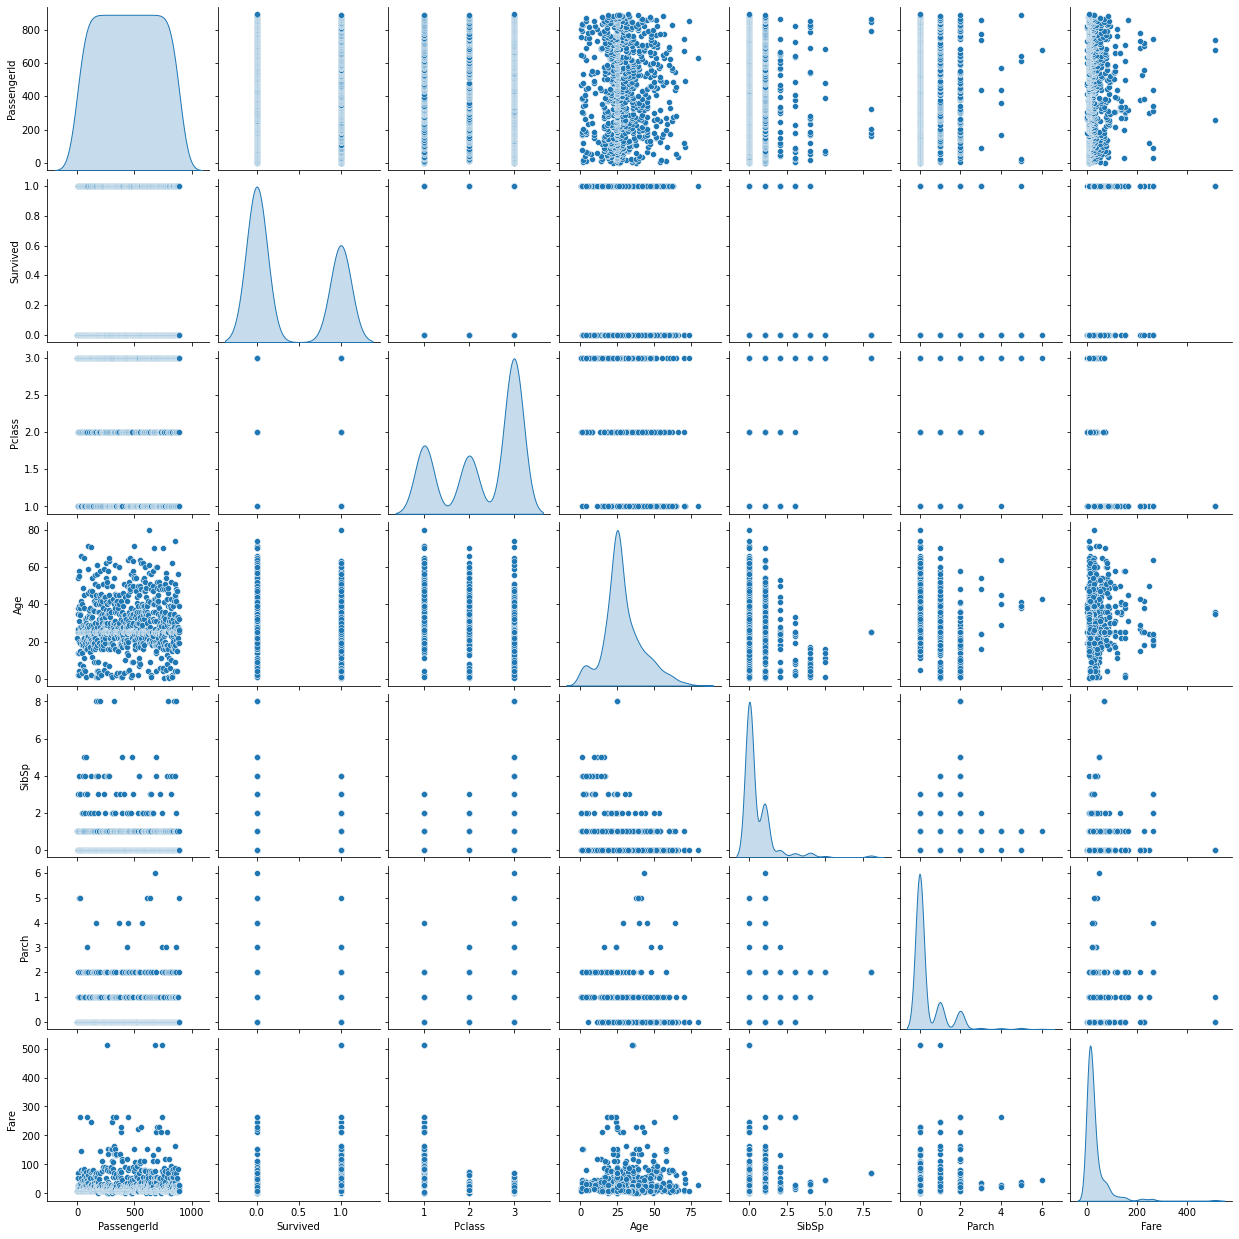

In [9]:
sns.pairplot(df, diag_kind='kde')

In [10]:
new_df=df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
new_df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [13]:
new_df_cat=new_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]

new_df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [14]:
categories = {"female": 1, "male": 0}
new_df['Sex']= new_df['Sex'].map(categories)

new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [15]:
updated_df = pd.concat([new_df, pd.get_dummies(new_df['Embarked'],drop_first=True)],axis=1)

updated_df.drop(['Embarked'],axis=1, inplace=True)
updated_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [16]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.6 KB


<AxesSubplot:>

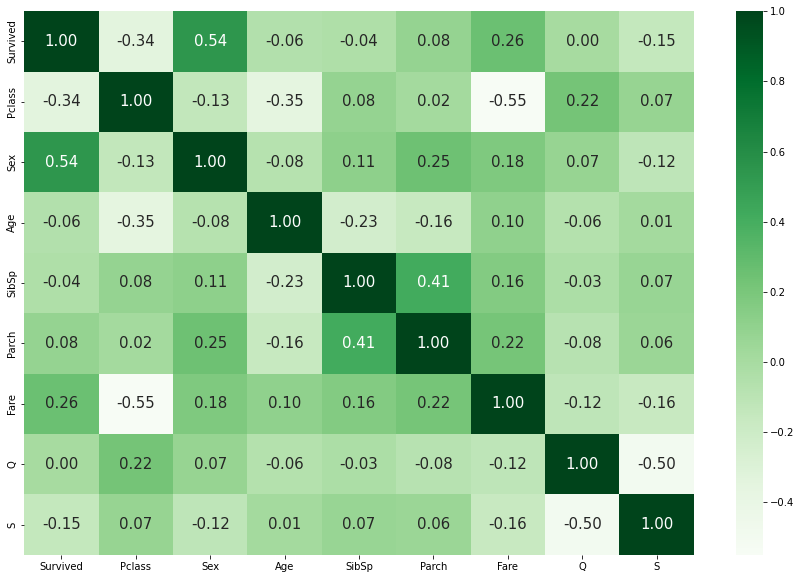

In [17]:
corr = updated_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [18]:
updated_df.drop(['Sex'], axis=1, inplace=True)

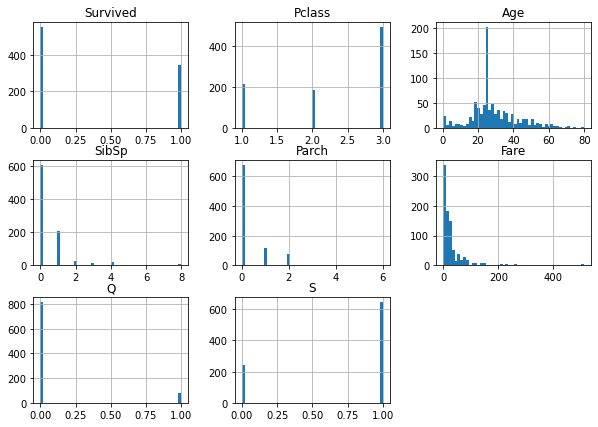

In [19]:
updated_df.hist(bins=50, figsize=(10,7))
plt.show()

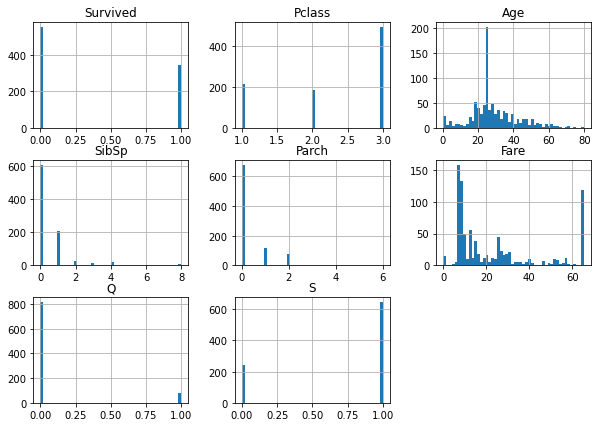

In [20]:
Q1 = updated_df['Fare'].quantile(0.25)
Q3 = updated_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
updated_df['Fare']=np.where(updated_df['Fare']>upper_whisker,upper_whisker,np.where(updated_df['Fare']<lower_whisker,lower_whisker,updated_df['Fare']))

updated_df.hist(bins=50, figsize=(10,7))
plt.show()

In [21]:
X = np.asarray(updated_df.drop(['Survived'], axis=1))
y = np.asarray(updated_df['Survived'])

In [22]:
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=20)

In [23]:
lr = LogisticRegression().fit(X_train, y_train)

print('Training score: ', round(lr.score(X_train, y_train),3))
print('Testing score: ', round(lr.score(X_test, y_test),3))

Training score:  0.719
Testing score:  0.698


In [24]:
pred_classlr = lr.predict(X)
updated_df['Prediction - Random Forest'] = pred_classlr

In [25]:
confusion_matrix(y,pred_classlr)

array([[474,  75],
       [181, 161]], dtype=int64)

In [26]:
print(classification_report(y,pred_classlr))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79       549
           1       0.68      0.47      0.56       342

    accuracy                           0.71       891
   macro avg       0.70      0.67      0.67       891
weighted avg       0.71      0.71      0.70       891



In [27]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
clf.fit(X_train, y_train)

print('Training score: ', round(clf.score(X_train, y_train),3))
print('Testing score: ', round(clf.score(X_test, y_test),3))

Training score:  0.791
Testing score:  0.705


In [28]:
pred_classRF = clf.predict(X)
updated_df['Prediction - Random Forest'] = pred_classRF

In [29]:
confusion_matrix(y,pred_classRF)

array([[498,  51],
       [158, 184]], dtype=int64)

In [30]:
print(classification_report(y,pred_classRF))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       549
           1       0.78      0.54      0.64       342

    accuracy                           0.77       891
   macro avg       0.77      0.72      0.73       891
weighted avg       0.77      0.77      0.75       891

